In [1]:
%matplotlib inline

In [2]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import pandas as pd 

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [4]:
weather = pd.read_csv('WeatherDataPull/dataLargerSet.csv')
weather.head()

,Unnamed: 0,index,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,0,6,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,1,7,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,2,8,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,3,9,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,4,10,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [5]:
weatherClean=weather.drop(["Unnamed: 0", "index"], axis=1)
weatherClean.head()

,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,12.870968,61.387097,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,35.032258,76.903226,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,21.387097,61.677419,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [6]:
# Data Pre-Processing

In [7]:
weatherClean.columns

Index(['winery', 'vintage', 'points', 'cities', 'MarchLowTemp',
       'MarchHighTemp', 'MarchAvgTemp', 'MarchPrecip', 'MarchCloudiness',
       'MarchHumidity', 'AprilLowTemp', 'AprilHighTemp', 'AprilAvgTemp',
       'AprilPrecip', 'AprilCloudiness', 'AprilHumidity', 'MayLowTemp',
       'MayHighTemp', 'MayAvgTemp', 'MayPrecip', 'MayCloudiness',
       'MayHumidity', 'JuneLowTemp', 'JuneHighTemp', 'JuneAvgTemp',
       'JunePrecip', 'JuneCloudiness', 'JuneHumidity', 'JulyLowTemp',
       'JulyHighTemp', 'JulyAvgTemp', 'JulyPrecip', 'JulyCloudiness',
       'JulyHumidity', 'AugLowTemp', 'AugHighTemp', 'AugAvgTemp', 'AugPrecip',
       'AugCloudiness', 'AugHumidity'],
      dtype='object')

In [8]:
weatherCleandf = weatherClean.drop(['winery', 'vintage', 'cities'], axis=1)

In [9]:
weatherCleandf

,points,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,AprilLowTemp,AprilHighTemp,AprilAvgTemp,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,88,42.129032,68.419355,58.580645,1.5,12.870968,61.387097,42.800000,72.166667,62.900000,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,87,43.806452,62.161290,55.258065,9.4,35.032258,76.903226,45.666667,68.500000,61.233333,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,94,47.354839,68.548387,60.516129,1.2,21.387097,61.677419,49.566667,71.566667,64.433333,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,93,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,49.000000,71.066667,64.100000,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,91,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,49.000000,71.066667,64.100000,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,86,45.516129,60.129032,54.709677,2.8,16.129032,67.870968,49.233333,64.200000,59.266667,...,68.225806,0.3,3.387097,68.516129,63.129032,77.419355,72.806452,0.0,2.935484,57.451613
1324,92,51.064516,65.387097,59.806452,1.8,19.451613,62.741935,51.400000,67.433333,62.100000,...,72.838710,0.3,9.290323,64.806452,61.806452,77.193548,72.387097,0.0,1.870968,63.064516
1325,90,38.451613,62.064516,53.064516,4.0,32.645161,73.354839,39.366667,62.300000,54.733333,...,77.516129,0.0,2.000000,51.064516,47.806452,88.161290,74.838710,0.0,5.548387,57.677419
1326,89,35.870968,57.967742,50.032258,12.2,50.096774,78.129032,39.400000,66.633333,57.700000,...,74.064516,0.0,5.774194,61.935484,52.645161,87.645161,75.516129,0.0,3.612903,55.967742


In [18]:
X = weatherCleandf.iloc[:, 2].values
print(X)
y = weatherCleandf.iloc[:, 0].values
print(y)
y=np.array(y).reshape(-1,1)
print(y)

[68.41935484 62.16129032 68.5483871  ... 62.06451613 57.96774194
 54.96774194]
[88 87 94 ... 90 89 85]
[[88]
 [87]
 [94]
 ...
 [90]
 [89]
 [85]]


In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X.reshape(-1,1))
y = sc_y.fit_transform(y.reshape(-1,1))

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

C:\Users\belen\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [22]:
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)

In [23]:
df = pd.DataFrame({'Real Values':sc_y.inverse_transform(y_test.reshape(-1)), 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
0,83.0,88.649377
1,86.0,88.769744
2,81.0,88.362592
3,88.0,88.278306
4,93.0,88.666986
...,...,...
261,87.0,88.597686
262,90.0,88.580902
263,89.0,88.649377
264,90.0,89.187437


In [28]:
countTot=0
rowCount=0
for index, row in df.iterrows():
    countTot+=row['Predicted Values']-row['Real Values']
    rowCount+=1


5.649376953297761
8.419121426384564
15.781712985349344
16.060019178975963
11.727005435089609
12.405062219527196
12.054439172824956
10.535069748388835
6.940165319628065
7.537850826444469
13.225994331714901
14.866266260638795
17.346896836202674
14.652959654580584
15.428118418784607
15.054261333758589
16.72245058705562
14.49760935125964
9.267353824346444
6.454790574168058
9.184490955252883
10.491618125789714
7.220023039302092
4.517010493054457
8.205153998324889
4.903155444979134
2.593946205977545
8.215122331484451
6.736482325160182
7.233793038563562
6.755153032239292
8.174249932032069
10.76295408156129
10.373560009165516
6.670547462917881
10.509577475469897
10.84735350328529
7.034790253106905
10.804534726193708
6.077574839374904
4.675260346191308
7.363255355544226
3.0813526585798883
4.378340112332253
1.9552153635544443
-2.767721844142258
4.529265609610107
7.11852862290425
7.536065282884181
10.253172058344276
7.809346852083948
3.1354440340467136
-7.266870459136882
-3.988564265510263
-8.650

In [29]:
print("Row Count:")
print(rowCount)
print("Sum of diff:")
print(countTot)
print("Average error:")
print(countTot/rowCount)

Row Count:
266
Sum of diff:
-52.231757546002086
Average error:
-0.19635999077444394


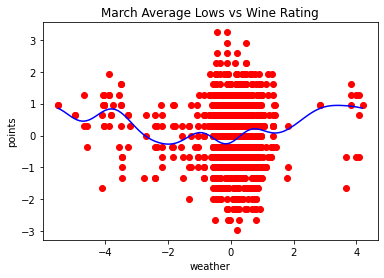

In [24]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('March Average Lows vs Wine Rating')
plt.xlabel('weather')
plt.ylabel('points')
plt.show()